To measure PP1 intensities 

In [7]:
# import necessary modules
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import skimage.filters as filters
import skimage.color as color
from PIL import Image
import pandas as pd
from skimage.util import img_as_float
from skimage.color import label2rgb, rgb2gray,gray2rgb
from skimage import segmentation,morphology,feature,measure,filters
from scipy import ndimage as ndi
import glob
from natsort import natsorted 
import os
import glob
import re

In [8]:
# import function file
%run functions-Cytoplasm-Method1.ipynb

In [9]:
# path to the local folder for the notebooks
# change path to your folders accordingly
BASE_DIR="/Users/Trupti/01-LIDo/02-VijiProject/ImageAnalysis/" 
#path to the image folder. # change the name of the folder for different dataset
FOLDER="set2-pp1/"
IMAGE_DIR=BASE_DIR + "data/XMovie/" + FOLDER
CSV_DIR = BASE_DIR + "AnalysisMethods/AnalysisResults/XMovie/" + FOLDER +"/" + "csvs/"


#### A List for the Images Folders

In [10]:
dmso=[]
cdki=[]
dmso_path = IMAGE_DIR + 'dmso'
cdki_path=IMAGE_DIR + 'cdki'

for folder in glob.glob(dmso_path + '/*'):
    dmso.append(dmso_path + '/' + folder.split('/')[-1].split('.')[0])
for folder in glob.glob(cdki_path + '/*'):
    cdki.append(cdki_path + '/' + folder.split('/')[-1].split('.')[0])     


In [11]:
# For DMSO

for i in range(len(dmso)):
    
    df_mask,df_channel,mask_cyto,channel_cyto,mask_bg,channel_bg=method1(dmso[i])
    
    df=pd.merge(df_mask, df_channel,  how='outer',on=['label']
                                                       ,suffixes=('_mask', '_channel'))
    df['mask_cyto']=mask_cyto
    df['channel_cyto']=channel_cyto
    df['mask_bg']=mask_bg
    df['channel_bg']=channel_bg
    
    directory=dmso[i].split('/')[-1].split('.')[0] # to create a folder per experiment to save csvs
    path = CSV_DIR + 'dmso/' + directory
    try:
        os.makedirs(path)
    except FileExistsError:
    # directory already exists
        pass
    check_nan_in_df = df.isnull().values.any()
    print("There are %d NaN values in %s " %(check_nan_in_df , directory))
    
  
    df.to_csv(path + '/' + 'particles'+'.csv') 
   

There are 0 NaN values in Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG132_DMSO_well3_point6_11min01_R3D_D3D 
There are 0 NaN values in Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG132_DMSO_well3_point3_2min01_R3D_D3D 
There are 0 NaN values in Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG132_DMSO_well3_point4_15min01_R3D_D3D 
There are 0 NaN values in Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG132_DMSO_well3_point5_13min01_R3D_D3D 
There are 0 NaN values in Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG132_DMSO_well3_point7_10min01_R3D_D3D 
There are 0 NaN values in Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG132_DMSO_well3_point1_18min01_R3D_D3D 


In [12]:
# For CDKi

for i in range(len(cdki)):
    
    df_mask,df_channel,mask_cyto,channel_cyto,mask_bg,channel_bg=method1(cdki[i])
    
    df=pd.merge(df_mask, df_channel,  how='outer',on=['label']
                                                       ,suffixes=('_mask', '_channel'))
    df['mask_cyto']=mask_cyto
    df['channel_cyto']=channel_cyto
    df['mask_bg']=mask_bg
    df['channel_bg']=channel_bg
    
    directory=cdki[i].split('/')[-1].split('.')[0] # to create a folder per experiment to save csvs
    path = CSV_DIR + 'cdki/' + directory
    try:
        os.makedirs(path)
    except FileExistsError:
    # directory already exists
        pass
    check_nan_in_df = df.isnull().values.any()
    print("There are %d NaN values in %s " %(check_nan_in_df , directory))
    df.to_csv(path + '/' + 'particles'+'.csv') 
   

There are 0 NaN values in Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG132_RO3306_well2_point8_12min01_R3D_D3D 
There are 0 NaN values in Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG132_RO3306_well2_point7_14min01_R3D_D3D 
There are 0 NaN values in Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG132_RO3306_well2_point6_16min01_R3D_D3D 
There are 0 NaN values in Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG132_RO3306_well2_point10_10min01_R3D_D3D 
There are 0 NaN values in Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG132_RO3306_well2_point9_11min01_R3D_D3D 
There are 0 NaN values in Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG132_RO3306_well2_point4_19min01_R3D_D3D 


### Plots

In [13]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=1, rc={"lines.linewidth":2.5})

# path to save graphs
GRAPH_DIR=BASE_DIR + "AnalysisMethods/AnalysisResults/XMovie/" + FOLDER + "/" + "graphs/"


In [14]:
# plot graphs 
# dmso vs cdki
# The paths are for the generated csv files
dmso_csv=[]
cdki_csv=[]
dmso_path = CSV_DIR + 'dmso'
cdki_path=CSV_DIR + 'cdki'

for folder in natsorted(glob.glob(dmso_path + '/*')):
    dmso_csv.append(dmso_path + '/' + folder.split('/')[-1].split('.')[0])
    
for folder in natsorted(glob.glob(cdki_path + '/*')):
    cdki_csv.append(cdki_path + '/' + folder.split('/')[-1].split('.')[0])  
 

In [15]:
# read both csvs to a dataframe
cell_count=0
df_graph=pd.DataFrame()
for i in range(len(cdki_csv)):
    df_cdki_bg=pd.read_csv(cdki_csv[i]+'/'+'Particles.csv')
    df_temp_cdki=pd.DataFrame(data=(df_cdki_bg['mean_intensity_channel']))
    df_temp_cdki['channel@kt/channel@cyto']= df_cdki_bg['mean_intensity_channel']/df_cdki_bg['channel_cyto']
    df_temp_cdki['mask@kt/mask@cyto']= df_cdki_bg['mean_intensity_mask']/df_cdki_bg['mask_cyto']
    df_temp_cdki['channel@kt/channel@cyto:mask@kt/mask@cyto']= df_temp_cdki['channel@kt/channel@cyto'] / df_temp_cdki['mask@kt/mask@cyto']
    #df_temp_cdki['mask@kt/mask@cyto:channel@kt/channel@cyto']= df_temp_cdki['mask@kt/mask@cyto'] /df_temp_cdki['channel@kt/channel@cyto'] 
    df_temp_cdki['condition']='cdki'
    expt_name=re.sub(r'^.+/([^/]+)$', r'\1', cdki_csv[i])
    df_temp_cdki['Experiment']= expt_name#'cdki_%d'%i
    
    df_dmso_bg=pd.read_csv(dmso_csv[i]+'/'+'Particles.csv')
    df_temp_dmso=pd.DataFrame(data=(df_dmso_bg['mean_intensity_channel']))
    df_temp_dmso['channel@kt/channel@cyto']= df_dmso_bg['mean_intensity_channel']/df_dmso_bg['channel_cyto']
    df_temp_dmso['mask@kt/mask@cyto']= df_dmso_bg['mean_intensity_mask']/df_dmso_bg['mask_cyto']
    df_temp_dmso['channel@kt/channel@cyto:mask@kt/mask@cyto']= df_temp_dmso['channel@kt/channel@cyto'] / df_temp_dmso['mask@kt/mask@cyto']
    #df_temp_dmso['mask@kt/mask@cyto:channel@kt/channek@cyto']= df_temp_dmso['mask@kt/mask@cyto'] / df_temp_dmso['channel@kt/channel@cyto'] 
    df_temp_dmso['condition']='dmso'
    expt_name=re.sub(r'^.+/([^/]+)$', r'\1', dmso_csv[i])
    df_temp_dmso['Experiment']= expt_name#'cdki_%d'%i
   
   
    
    df_graph=pd.concat([df_graph,df_temp_cdki,df_temp_dmso],ignore_index=True)
    df_graph['mask@kt/mask@cyto:channel@kt/channek@cyto']= 1/ df_graph['channel@kt/channel@cyto:mask@kt/mask@cyto']
    
    cell_count+=1

df_graph.head()

,mean_intensity_channel,channel@kt/channel@cyto,mask@kt/mask@cyto,channel@kt/channel@cyto:mask@kt/mask@cyto,condition,Experiment,mask@kt/mask@cyto:channel@kt/channek@cyto
0,9768.947368,1.253091,1.251251,1.001470,cdki,Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG...,0.998532
1,10591.928571,1.358657,1.297496,1.047137,cdki,Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG...,0.954985
2,7425.888889,0.952540,1.469400,0.648251,cdki,Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG...,1.542612
3,9842.125000,1.262477,1.182899,1.067274,cdki,Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG...,0.936967
4,10472.416667,1.343327,1.185230,1.133389,cdki,Expt2021_006_Set2_HeLaYFP-PP1_Nuf2-CFP_STLC_MG...,0.882309


In [16]:
# count the number of KTs in CDKi and DMSO
cdki = df_graph[df_graph['condition']=='cdki'].shape[0]
dmso = df_graph[df_graph['condition']=='dmso'].shape[0]

### channel@kt/channel@cyto

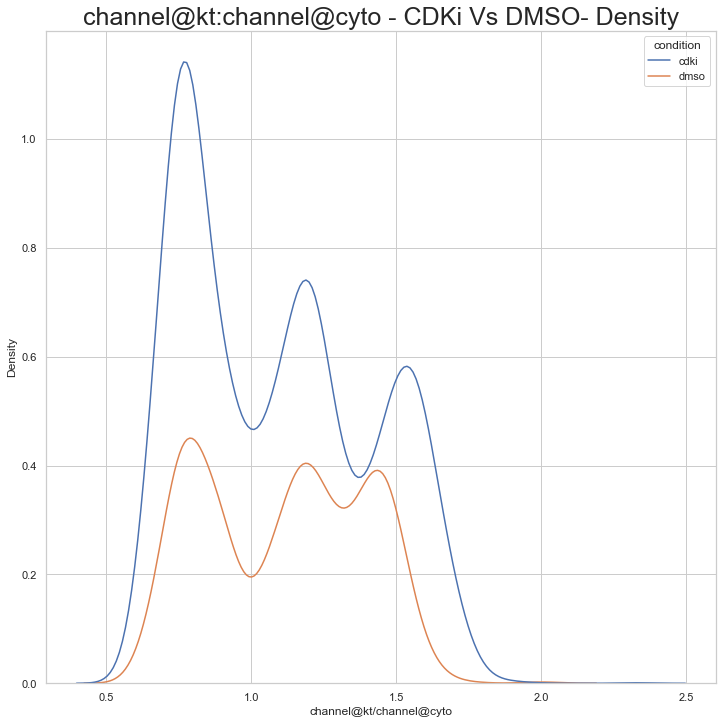

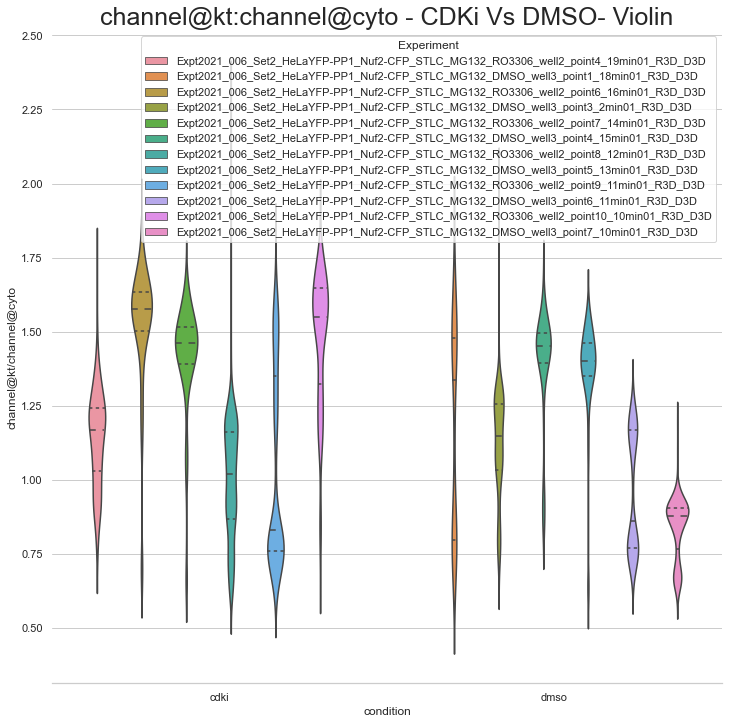

In [17]:
import seaborn as sns

title="channel@kt:channel@cyto - CDKi Vs DMSO- Density"
plt.figure(figsize=(12,12))
sns.set_theme(style="whitegrid")

sns_plot=sns.kdeplot(data=df_graph, x="channel@kt/channel@cyto",hue='condition').set_title(title,fontsize=25)
sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)


title="channel@kt:channel@cyto - CDKi Vs DMSO- Violin"
plt.figure(figsize=(12,12))
sns.set_theme(style="whitegrid")


# Draw a nested violinplot and split the violins for easier comparison
sns_plot=sns.violinplot(data=df_graph, x="condition", y="channel@kt/channel@cyto", hue="Experiment",
              inner="quart",
               ).set_title(title,fontsize=25)

sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)
sns.despine(left=True)

#title="channel@kt:channel@cyto - CDKi Vs DMSO- Box"
#plt.figure(figsize=(12,12))
#sns_plot=sns.boxplot(x="condition", y="channel@kt/channel@cyto",hue="Experiment",data=df_graph).set_title(title)
#sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)

#title="channel@kt:channel@cyto - CDKi Vs DMSO- Bar"
#plt.figure(figsize=(12,12))

#sns_plot = sns.barplot(
#        data=df_graph,
#        x="condition",
#        y="channel@kt/channel@cyto",
#        hue="Experiment"
#    ).set_title(title)
#sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)
plt.show()





### Mask@kt : mask@cyto

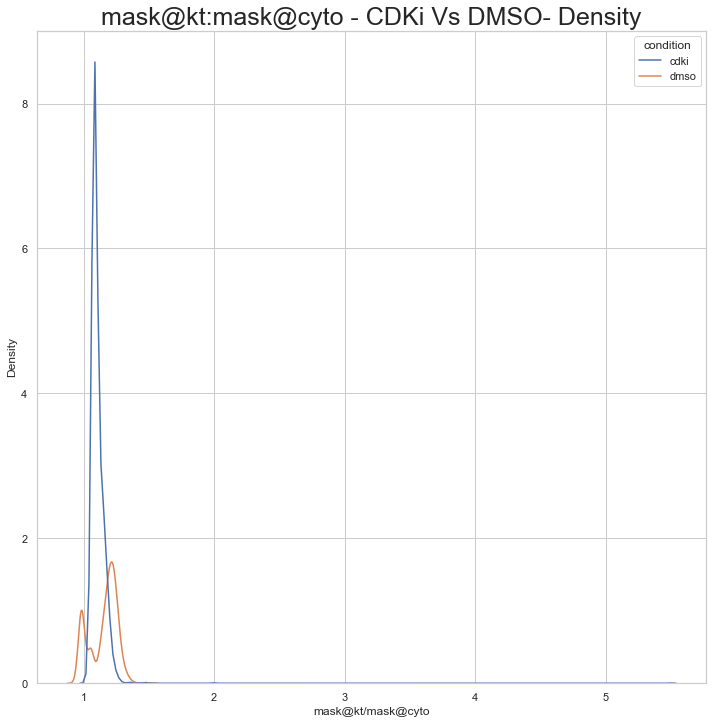

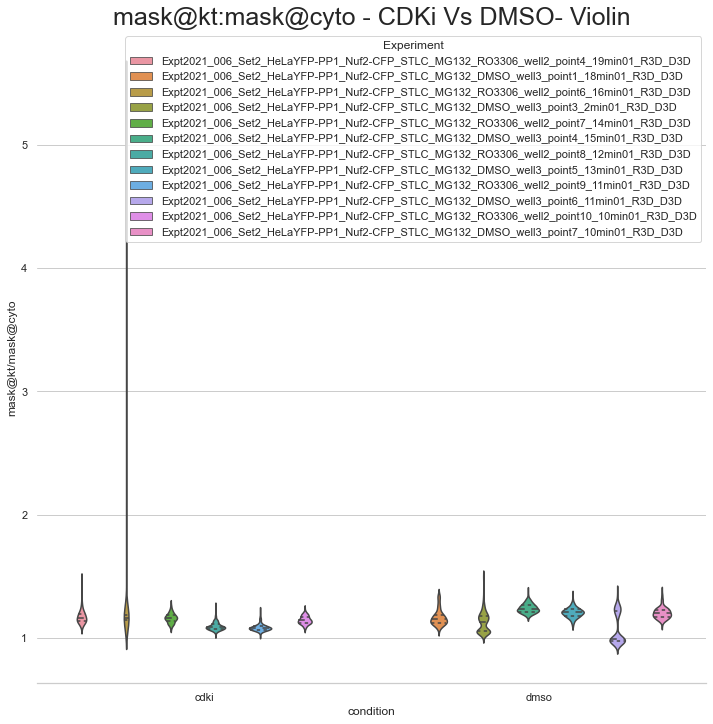

In [18]:
import seaborn as sns
title="mask@kt:mask@cyto - CDKi Vs DMSO- Density"
plt.figure(figsize=(12,12))
sns.set_theme(style="whitegrid")

sns_plot=sns.kdeplot(data=df_graph, x="mask@kt/mask@cyto",hue='condition').set_title(title,fontsize=25)
sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)

title="mask@kt:mask@cyto - CDKi Vs DMSO- Violin"
plt.figure(figsize=(12,12))
sns.set_theme(style="whitegrid")
# Draw a nested violinplot and split the violins for easier comparison
sns_plot=sns.violinplot(data=df_graph, x="condition", y="mask@kt/mask@cyto", hue="Experiment",
              inner="quart",
               ).set_title(title,fontsize=25)

sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)
sns.despine(left=True)

plt.show()

### channel@kt/channel@cyto:mask@kt/mask@cyto

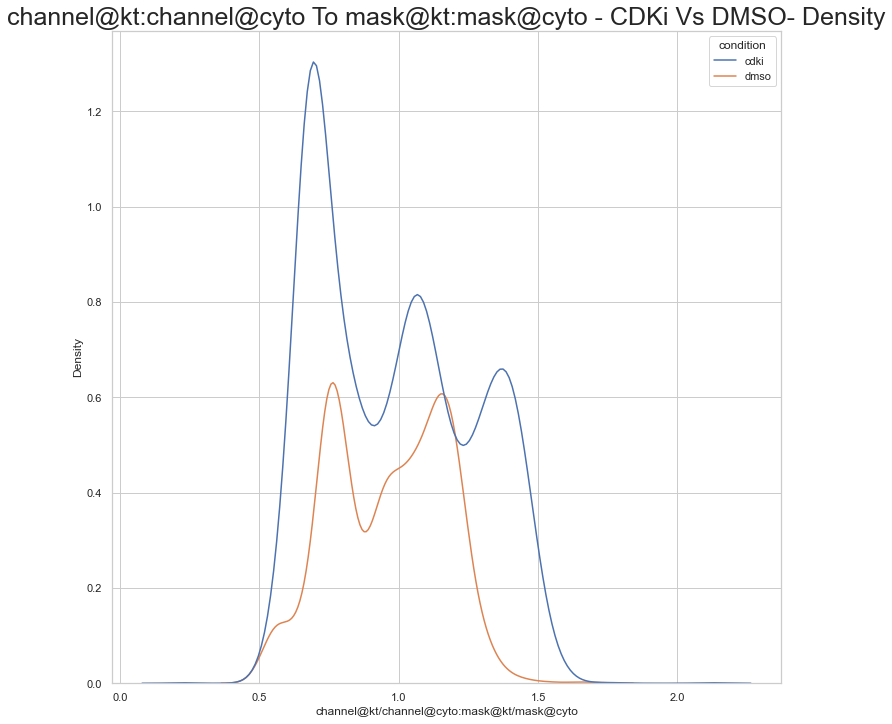

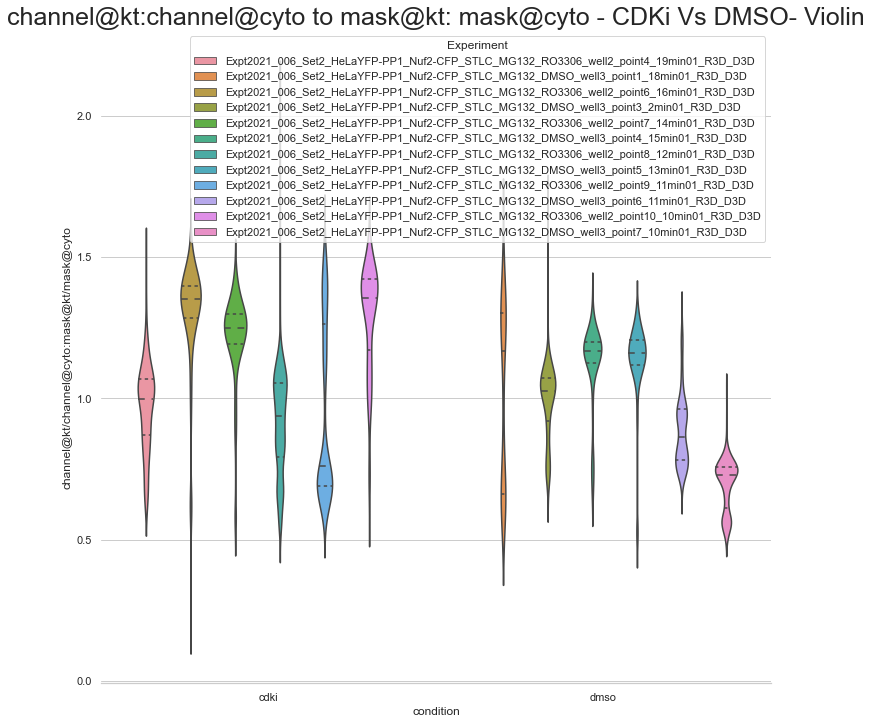

In [19]:
import seaborn as sns
title="channel@kt:channel@cyto To mask@kt:mask@cyto - CDKi Vs DMSO- Density"
plt.figure(figsize=(12,12))
sns.set_theme(style="whitegrid")

sns_plot=sns.kdeplot(data=df_graph, x="channel@kt/channel@cyto:mask@kt/mask@cyto",hue='condition').set_title(title,fontsize=25)
sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)

title="channel@kt:channel@cyto to mask@kt: mask@cyto - CDKi Vs DMSO- Violin"
plt.figure(figsize=(12,12))
sns.set_theme(style="whitegrid")
# Draw a nested violinplot and split the violins for easier comparison
sns_plot=sns.violinplot(data=df_graph, x="condition", y="channel@kt/channel@cyto:mask@kt/mask@cyto", hue="Experiment",
              inner="quart",
               ).set_title(title,fontsize=25)

sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)
sns.despine(left=True)

plt.show()

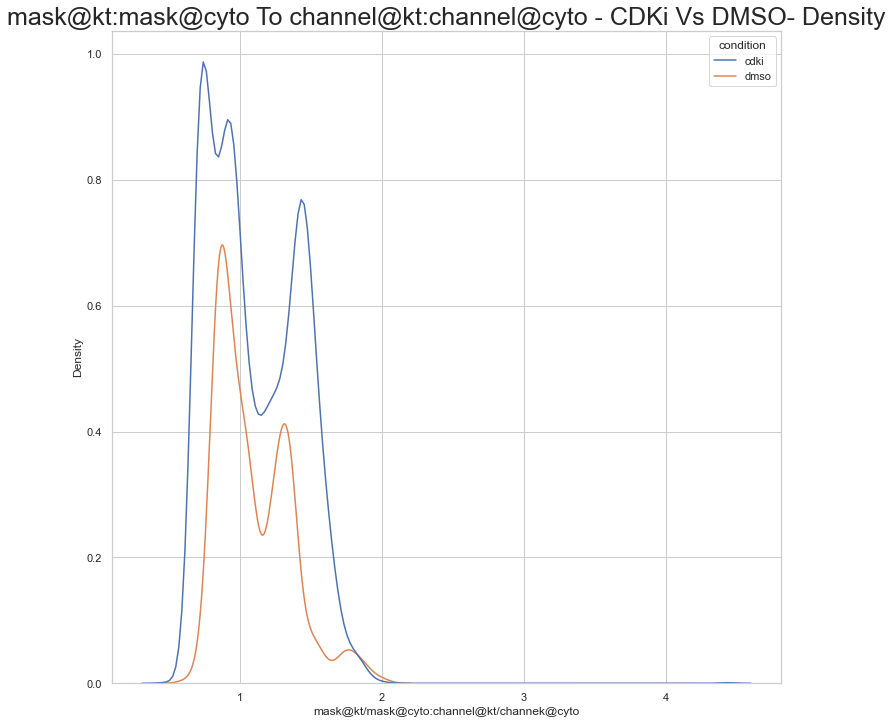

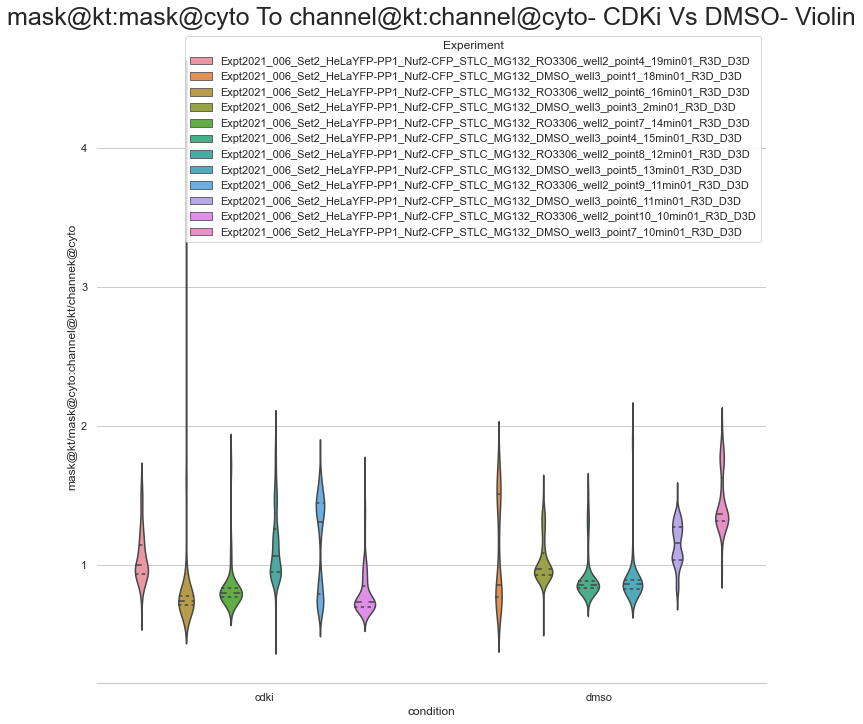

In [20]:
import seaborn as sns
title="mask@kt:mask@cyto To channel@kt:channel@cyto - CDKi Vs DMSO- Density"
plt.figure(figsize=(12,12))
sns.set_theme(style="whitegrid")

sns_plot=sns.kdeplot(data=df_graph, x="mask@kt/mask@cyto:channel@kt/channek@cyto",hue='condition').set_title(title,fontsize=25)
sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)

title="mask@kt:mask@cyto To channel@kt:channel@cyto- CDKi Vs DMSO- Violin"
plt.figure(figsize=(12,12))
sns.set_theme(style="whitegrid")
# Draw a nested violinplot and split the violins for easier comparison
sns_plot=sns.violinplot(data=df_graph, x="condition", y='mask@kt/mask@cyto:channel@kt/channek@cyto', hue="Experiment",
              inner="quart",
               ).set_title(title,fontsize=25)

sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)
sns.despine(left=True)

plt.show()

In [ ]:
plt.figure(figsize=(15,15))
sns.set(font_scale=1.5)
title='PairPlot - Condition'
sns_plot=sns.pairplot(df_graph, hue="condition")

replacements = {'mean_intensity_channel': 'ch_int', 'channel@kt/channel@cyto': 'ch_kt:ch_cy',
                'mask@kt/mask@cyto': 'm_kt:m_cy','mask@kt/mask@cyto:channel@kt/channek@cyto':'mkt/mcy:chkt/chcy',
               'channel@kt/channel@cyto:mask@kt/mask@cyto':'chkt/chcy:mkt/mcy'}
for i in range(5):
    for j in range(5):
        xlabel = sns_plot.axes[i][j].get_xlabel()
        ylabel = sns_plot.axes[i][j].get_ylabel()
        if xlabel in replacements.keys():
            sns_plot.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            sns_plot.axes[i][j].set_ylabel(replacements[ylabel])


sns_plot.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)
plt.show()

In [ ]:
plt.figure(figsize=(15,15))
title="PairPlot - Experiment"
sns.set(font_scale=1.5)

sns_plot=sns.pairplot(df_graph, hue="Experiment")

replacements = {'mean_intensity_channel': 'ch_int', 'channel@kt/channel@cyto': 'ch_kt:ch_cy',
                'mask@kt/mask@cyto': 'm_kt:m_cy','mask@kt/mask@cyto:channel@kt/channek@cyto':'m_kt/m_cy:ch_kt/ch_cy',
               'channel@kt/channel@cyto:mask@kt/mask@cyto':'ch_kt/ch_cy:m_kt/m_cyto'}
for i in range(5):
    for j in range(5):
        xlabel = sns_plot.axes[i][j].get_xlabel()
        ylabel = sns_plot.axes[i][j].get_ylabel()
        if xlabel in replacements.keys():
            sns_plot.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            sns_plot.axes[i][j].set_ylabel(replacements[ylabel])

sns_plot.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)
plt.show()